In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten,GRU,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam


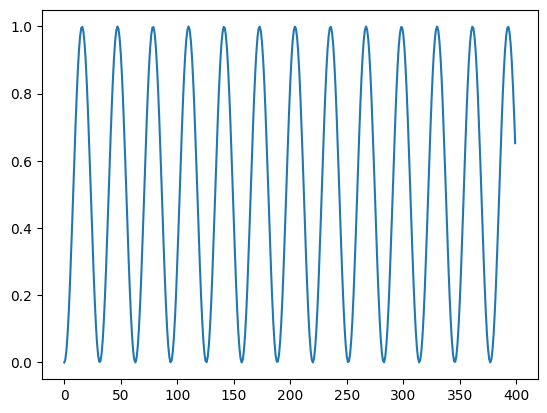

In [ ]:
series=(np.sin(0.1*np.arange(400))**2)
plt.plot(series)
#its in the form x(t)=sin(wt^2)

In [ ]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T)#data should be N*T
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)

(390, 10) (390,)


In [ ]:
# auotregression linearmodel
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.01)

)

In [ ]:
#training the model

r=model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[:-N//2],Y[:-N//2]),epochs=80)

Epoch 1/80
7/7 [==============================] - 0s 57ms/step - loss: 0.1610 - val_loss: 0.1594
Epoch 2/80
7/7 [==============================] - 0s 22ms/step - loss: 0.1585 - val_loss: 0.1571
Epoch 3/80
7/7 [==============================] - 0s 24ms/step - loss: 0.1562 - val_loss: 0.1549
Epoch 4/80
7/7 [==============================] - 0s 19ms/step - loss: 0.1541 - val_loss: 0.1526
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.1518 - val_loss: 0.1502
Epoch 6/80
7/7 [==============================] - 0s 11ms/step - loss: 0.1495 - val_loss: 0.1480
Epoch 7/80
7/7 [==============================] - 0s 12ms/step - loss: 0.1472 - val_loss: 0.1458
Epoch 8/80
7/7 [==============================] - 0s 12ms/step - loss: 0.1450 - val_loss: 0.1435
Epoch 9/80
7/7 [==============================] - 0s 14ms/step - loss: 0.1427 - val_loss: 0.1413
Epoch 10/80
7/7 [==============================] - 0s 12ms/step - loss: 0.1404 - val_loss: 0.1390
Epoch 11/80
7/7 [============

Text(0, 0.5, 'loss')

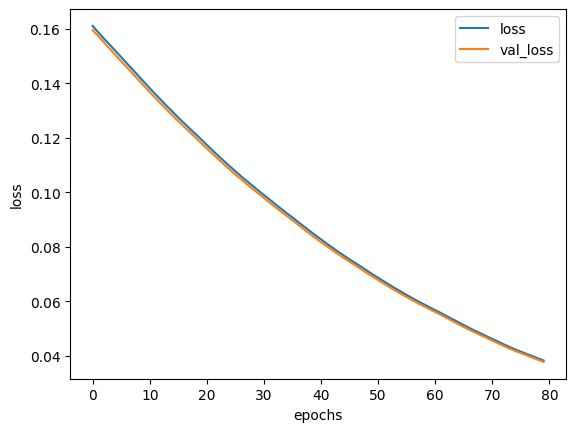

In [ ]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend(loc=0)
plt.xlabel("epochs")
plt.ylabel("loss")

13/13 [==============================] - 0s 2ms/step


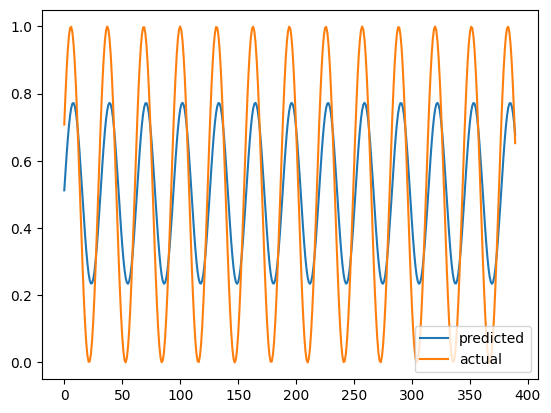

In [ ]:
output=model.predict(X)
plt.plot(output,label="predicted")
plt.plot(Y,label="actual")
plt.legend()

In [ ]:
#forecast future values (use only self predictions for the making future predictions)
validation_target=Y[-N//2:]
validation_predict=[]
#last train input
last_x=X[-N//2]
while len(validation_predict)<len(validation_target):
  p=model.predict(last_x.reshape(1,-1))[0,0]#1x1 array->scalar
  #update the prediction_list
  validation_predict.append(p)
  #make the new input
  last_x=np.roll(last_x,-1)
  last_x[-1]=p

1/1 [==============================] - 0s 22ms/step


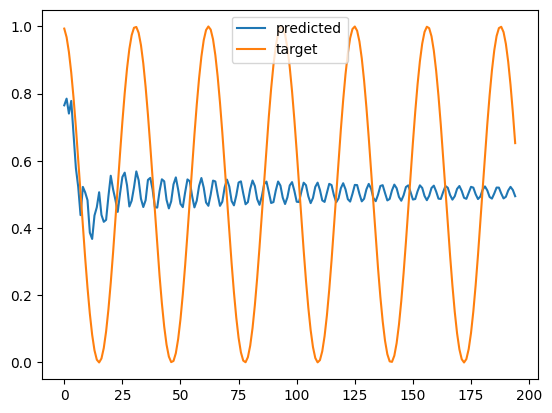

In [ ]:
plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="target")
plt.legend()

In [ ]:
#now from RNN/LSTM model
X=X.reshape(-1,T,1)
# model
i=Input(shape=(T,1))
x=SimpleRNN(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.05)

)

In [ ]:
#training the model

r=model.fit(X[:-N//2],Y[:-N//2],validation_data=(X[:-N//2],Y[:-N//2]),epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 17ms/step - loss: 2.1742e-04 - val_loss: 2.0124e-04
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 2.0065e-04 - val_loss: 2.0207e-04
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 2.0310e-04 - val_loss: 2.0896e-04
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 2.0712e-04 - val_loss: 1.9648e-04
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 1.9207e-04 - val_loss: 1.9835e-04
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 2.1243e-04 - val_loss: 1.9225e-04
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 1.8758e-04 - val_loss: 1.8597e-04
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 1.8551e-04 - val_loss: 1.8264e-04
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 1.9548e-04 - val_loss: 1.8083e-04
Epoch 10/200
7/7 [============================

Text(0, 0.5, 'loss')

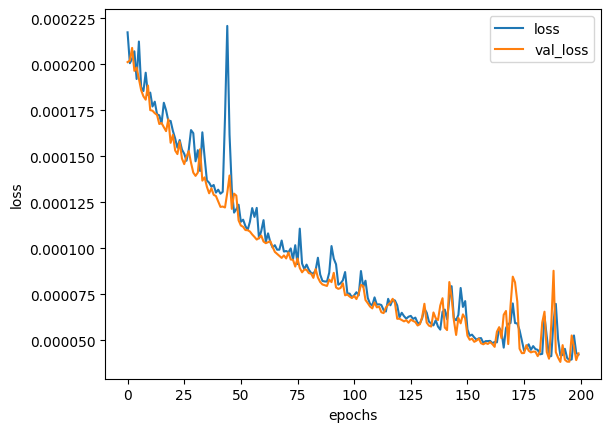

In [ ]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend(loc=0)
plt.xlabel("epochs")
plt.ylabel("loss")

13/13 [==============================] - 0s 3ms/step


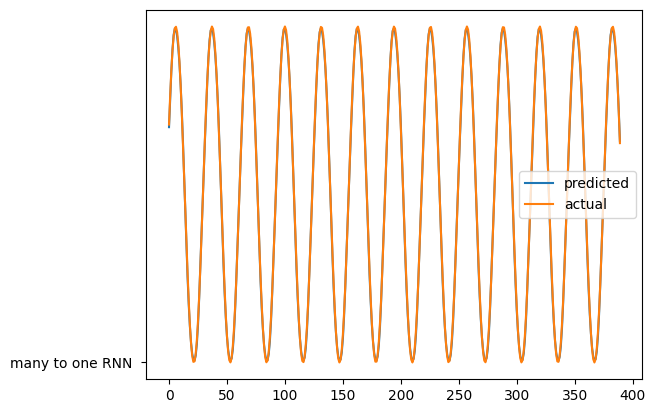

In [23]:
#one step forcast using true
output=model.predict(X)
output.shape
predictions=output[:,0]
plt.plot(predictions,label="predicted")
plt.plot(Y,label="actual")
plt.plot("many to one RNN ")
plt.legend()

In [26]:
#forecast future values (use only self predictions for the making future predictions)
#multistep forcast
validation_target=Y[-N//2:]
validation_predict=[]
#last train input
last_x=X[-N//2]
while len(validation_predict)<len(validation_target):
  p=model.predict(last_x.reshape(1,-1,1))[0,0]#1x1 array->scalar
  #update the prediction_list
  validation_predict.append(p)
  #make the new input
  last_x=np.roll(last_x,-1)
  last_x[-1]=p

1/1 [==============================] - 0s 39ms/step


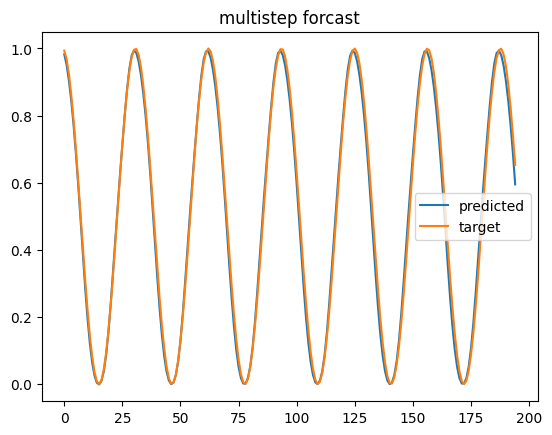

In [28]:
plt.plot(validation_predict,label="predicted")
plt.plot(validation_target,label="target")
plt.title("multistep forcast")
plt.legend()